In [1]:
#Title : Logistic Regression
#Author : Gaurav Karale 
#Date : 3/10/2016
#Assignment : 5 

In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['survived'] = df['Survived']

In [6]:
y = X['survived']
X = X.drop(['survived'], axis=1)

In [7]:
X['sex'] = pd.get_dummies(X.sex)['female']

In [8]:
#X['age'] = pd.get_dummies(X.age<100)[1]

In [9]:
#get dummies for parch equal to 0(means chances of single person survival are higher)
X['parch'] = pd.get_dummies(X['parch']==0)[1]

In [10]:
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X = X.drop(['pclass_3', 'pclass'], axis=1)
X['sibsp'] = pd.get_dummies(X.sibsp<2)[1]

In [11]:
meanAge = X['age'].mean()
X['age'] = X['age'].fillna(meanAge)

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=10)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import accuracy_score
print"Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.81


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.82      0.87      0.84       105
          1       0.79      0.73      0.76        74

avg / total       0.81      0.81      0.81       179



In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

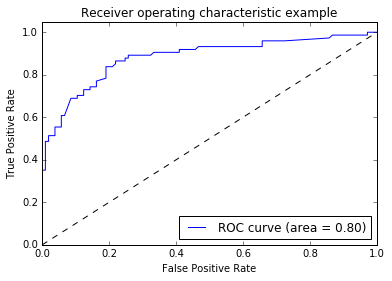

In [19]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

AUC is coming 80% after taking dummies for sex, parch, pclass, sibsp 